# **IMPORT IMPORTANT LIBRARIES**

In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL
import PIL.Image
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

from IPython.display import clear_output
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **SET HYPERPARAMETER**

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 512
IMG_WIDTH = 512
EPOCHS=50

# **DATA PIPELINING**

# **Extract**

In [ ]:
# Mengunduh dataset dari GitHub dengan git clone
!git clone https://github.com/zidan2808/ART-DATASET.git

# Mengatur path ke folder dataset
dataset_dir = 'ART-DATASET/Surreal Symphonies (A dataset of Diverse Artistic Visions)'

# Buat direktori baru untuk menyimpan gambar yang telah diproses
preprocessed_dir = 'preprocessed_symphonies'
if not os.path.exists(preprocessed_dir):
    os.makedirs(preprocessed_dir)

Cloning into 'ART-DATASET'...
remote: Enumerating objects: 1626, done.
remote: Total 1626 (delta 0), reused 0 (delta 0), pack-reused 1626
Receiving objects: 100% (1626/1626), 1.05 GiB | 48.69 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Updating files: 100% (11492/11492), done.


# **Transform**

In [ ]:
from PIL import Image

# Fungsi untuk memproses dan menyimpan gambar
def preprocess_and_save_image(image_path, save_path):
    with Image.open(image_path) as img:
        img = img.resize((IMG_HEIGHT, IMG_WIDTH))  # Mengubah ukuran gambar
        img = img.convert('RGB')  # Mengubah gambar ke mode RGB
        img.save(save_path, 'PNG')  # Menyimpan gambar sebagai PNG

# Menelusuri direktori dataset dan memproses gambar
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
            image_path = os.path.join(root, file)
            relative_path = os.path.relpath(image_path, dataset_dir)
            save_path = os.path.join(preprocessed_dir, os.path.splitext(relative_path)[0] + '.png')

            # Membuat direktori jika belum ada
            os.makedirs(os.path.dirname(save_path), exist_ok=True)

            # Memproses dan menyimpan gambar
            preprocess_and_save_image(image_path, save_path)

print("Semua gambar telah diproses dan disimpan sebagai PNG.")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Semua gambar telah diproses dan disimpan sebagai PNG.


# **Load**

In [ ]:
# Menggunakan ImageDataGenerator untuk memuat gambar yang telah diproses
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_dataset = datagen.flow_from_directory(
    preprocessed_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Ukuran gambar
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Gunakan 'categorical' untuk beberapa kelas
)

Found 7327 images belonging to 30 classes.


In [ ]:
class_indices = train_dataset.class_indices
num_classes = len(class_indices)
print(f"Jumlah kelas: {num_classes}")
print("Label kelas:", class_indices)

Jumlah kelas: 30
Label kelas: {'Abstract art': 0, 'Abstract expressionism paintings': 1, 'Academic art': 2, 'Art Nouveau paintings': 3, 'Art deco paintings': 4, 'Baroque paintings': 5, 'Constructivism art': 6, 'Contemporary art': 7, 'Cubism art': 8, 'Dadaism artwork': 9, 'Digital art': 10, 'Expressionism paintings': 11, 'Fauvism paintings': 12, 'Gothic art': 13, 'Impressionism artwork': 14, 'Mannerism paintings': 15, 'Minimalism art': 16, 'Modernism artwork': 17, 'Naive art': 18, 'Neo-expressionism art': 19, 'Neoclassical art': 20, 'Pop art': 21, 'Post-impressionism artwork': 22, 'Pre-Raphaelite paintings': 23, 'Realism paintings': 24, 'Renaissance paintings': 25, 'Romanticism paintings': 26, 'Surrealism artwork': 27, 'Surrealist paintings': 28, 'Symbolism artwork': 29}


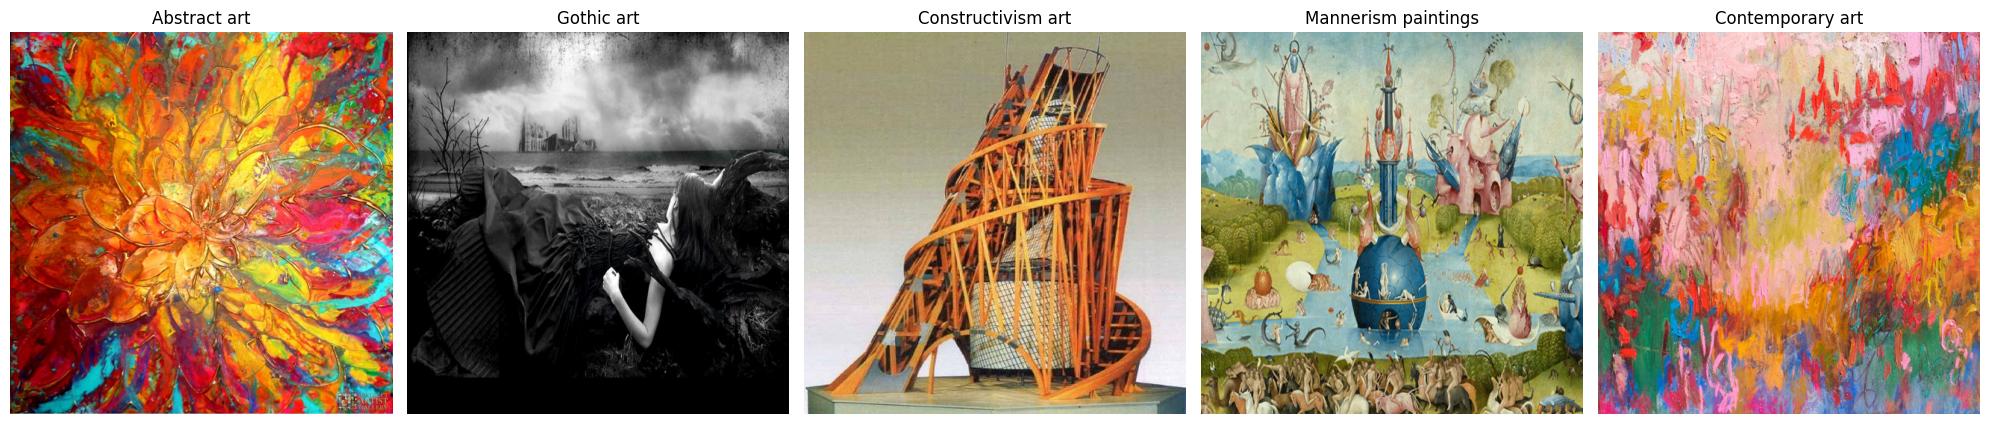

In [ ]:
# Menampilkan beberapa contoh gambar
def plot_images(images_arr, labels_arr, class_indices, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        label = list(class_indices.keys())[list(class_indices.values()).index(np.argmax(lbl))]
        ax.set_title(label)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Mendapatkan batch gambar dan label
images, labels = next(train_dataset)

# Menampilkan 5 contoh gambar
plot_images(images[:5], labels[:5], class_indices, num_images=5)